### Let's make an eta sequence.  How many powers of twos are between powers of three?

In [1]:
import numpy as np
from math import log, floor, pi
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
n = 12  # greatest number
p3 = [3**i for i in range(n)]
print(p3)

[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 59049, 177147]


In [3]:
p2 = [1]
c = 1
i = 1
while p2[-1] < p3[-1]:
    c = 2**i
    if c > p3[-1]:
        break
    i += 1
    p2.append(c)
print(p2)
print(len(p2))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
18


In [4]:
eta_list = []
for i in range(len(p3)-1):
    c = 0
    l = p3[i]
    u = p3[i+1]
    for j in p2:
        if l <= j <= u:
            c += 1
        else:
            break
    eta_list.append(c)
    for _ in range(c):
        p2.pop(0)
eta_list

[2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2]

In [5]:
np.sum(np.array(eta_list))

18

The number of powers of two up to and including a number N is $1 + floor(\log_2N)$

For $N=33$ there are 6 powers of two less than or equel to it

In [6]:
int(floor(1 + log(33, 2)))

6

## General formula for an eta sequence

$\eta_k(\alpha) = floor((k+1)\alpha) - floor(k\alpha)$

where 
- $alpha$ is any real number
- $k$ is the $k^{th}$ number in the sequence

In [7]:
def eta(a, k):
    return int(floor((k+1)*a) - floor(k*a))

In [8]:
eta_pi = ''.join([str(eta(pi, i)) for i in range(100000)])
# eta_pi

In [9]:
_deta_pi = eta_pi.split('4')
deta_pi = ''.join(str(len(i)) for i in _deta_pi)
deta_pi

'766666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666

In [10]:
_deta_pi = deta_pi.split('7')
deta_pi = ','.join(str(len(i)) for i in _deta_pi)
deta_pi

'0,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,1

In the teminollogy of hoffstader, 3 is the 'coun' and 4 is the 'sep', short for count and separator.

We have just created two new eta sequences by taking their derivatives.  The question at hand is, what value of $\alpha$ produces them?

Hoffstader awnsers this with the fundamental theorum of eta sequences which states

$\eta^\prime(alpha) = \eta(\alpha^\prime)$

where $\eta^\prime(alpha)$ is the "old style" derivative of $\eta(\alpha)$

 and $\alpha^\prime = \frac{s - \alpha}{\alpha - c}$
 
 where $c$ is the coun and $s$ is the sep distance
 
 What does this tell us really? Let's take the eta sequence of $\pi$, $\eta(\pi)$

In [11]:
eta_pi = ''.join([str(eta(pi, i)) for i in range(10000)])

The coun is 3 and sep is 4. The derivative is thus:

In [12]:
deta_pi = ''.join([str(int(len(i))) for i in eta_pi.split('4')])
deta_pi

'766666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666

This new sequence should be produced by
$\eta(\alpha^\prime) = \eta(\frac{s - \alpha}{\alpha - c}) = \eta(\frac{4 - \pi}{\pi - 3})$

In [13]:
a_prime = (4.0 - pi) / (pi - 3.0)
a_prime

6.062513305931052

In [14]:
eta_aprime = ''.join([str(eta(a_prime, i)) for i in range(len(deta_pi))])
eta_aprime

'666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666666666667666666666666666766666666666666676666666

In [15]:
'.'.join([str(int(len(i))) for i in eta_aprime.split('7')])

'15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.8'

In [16]:
'.'.join([str(int(len(i))) for i in deta_pi.split('7')])

'0.14.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.15.8'

It sort of looks like it is working, the separation distance is massive.

## Proof of the fundamental theorem of eta-sequences

Let's try to prove the fundamental theorem of eta-sequences:

$\eta^\prime(alpha) = \eta(\alpha^\prime)$

where $\eta^\prime(alpha)$ is the "old style" derivative of $\eta(\alpha)$

 and $\alpha^\prime = \frac{s - \alpha}{\alpha - c}$
 
 where $c$ is the coun and $s$ is the sep distance

---

We will start with values of $\alpha$ betwen 0 and 1/2 and can generalize for all values there after.

For $0 < \alpha < \frac{1}{2}, coun(\alpha) = 0$ and $sep(\alpha) = 1$

Sooner or later each integer, $N$ gets stradled by a multiple of $\alpha$.

Suppose that the multiples of alpha which straddle N are p alpha and (p+1) alpha

Further suppose that the multiples of alpha which straddle N+1 are q alpha and q+1 alpha.

then 

$\eta_p(\alpha) = \eta_q(\alpha) = 1$

All terms of $\eta(\alpha)$ between the $p^{th}$ and $q^{th}$ are 0.

*How many zeros does that make?*

As can be seen in the below sequence generated with $\alpha = 0.21$ sep of $1$ occours at the indicies 4 and 9, making $p=4$ and $q=9$.  There are 4 zeros between the two. The formula is thus 

$q - p - 1$

The values of $N$ which are stradled are $N=2$ and $N+1 = 3$
thus 

$p = floor(\frac{N}{\alpha})$

$q = floor(\frac{N+1}{\alpha})$

Reiterating, all terms between q and q are zero.

In [17]:
for i in range(16):
    pad = ' 'if i < 10 else ''
    print(eta(0.21, i), "| {:.2f}".format(i*0.21), "|", i)

0 | 0.00 | 0
0 | 0.21 | 1
0 | 0.42 | 2
0 | 0.63 | 3
1 | 0.84 | 4
0 | 1.05 | 5
0 | 1.26 | 6
0 | 1.47 | 7
0 | 1.68 | 8
1 | 1.89 | 9
0 | 2.10 | 10
0 | 2.31 | 11
0 | 2.52 | 12
0 | 2.73 | 13
1 | 2.94 | 14
0 | 3.15 | 15


In [18]:
floor(1.0/0.21)

4

In [19]:
floor(2.0/0.21)

9

## Let's take the derivative of this eta sequence

As Hoffstader did, if we take the derivative to literally mean the coun between steps, we must throw out the first run of couns.  This makes the following analysis line up

In [20]:
a = ''.join([str(eta(0.21, i)) for i in range(200)])
a

'00001000010000100001000100001000010000100010000100001000010001000010000100001000100001000010000100010000100001000010000100010000100001000010001000010000100001000100001000010000100010000100001000010001'

In [21]:
b = ''.join([str(int(len(i))) for i in a.split('1')])
b

'4444344434443444344434444344434443444344430'

In [22]:
b[4:]

'344434443444344434444344434443444344430'

Something can now be said about the derivative of the eta sequence. 

The Nth term of $\eta^{\prime}(\alpha)$ is equel to $q - p - 1$

which is equivelent to 

$[(N+1)\beta] - [N\beta]$

where

$\beta = \frac{1 - \alpha}{\alpha - 0} = {\alpha}^\prime$

Let's see if this works

In [23]:
alpha = 0.21
beta = (1.0 - alpha) / alpha
print(beta)
''.join([str(eta(beta, i)) for i in range(100)])

3.7619047619047623


'3444344434443444344443444344434443444344443444344434443444344443444344434443444344443444344434443444'

In [24]:
# for N = 4
N = 4
floor((N+1)*beta) - floor(N*beta)

3

In [25]:
# for N = 5
N = 5
floor((N+1)*beta) - floor(N*beta)

4

In [26]:
''.join(str(floor((N+1)*beta) - floor(N*beta)) for N in range(100))

'3444344434443444344443444344434443444344443444344434443444344443444344434443444344443444344434443444'

### Introducing Gamma

Suppose $\alpha \in [0, \frac{1}{2}]$ and $\alpha + \gamma = 1$

The sequence produced by gamma is complimentary in that the sep and coun are flipped.

One then finds that the derivatives of these sequences are the same.

thus $\eta^\prime(\alpha) = \eta^\prime(\gamma)$

In [27]:
alpha = 0.21
gamma = 1.0 - alpha
s0 = ''.join([str(eta(alpha, i)) for i in range(150)])
s1 = ''.join([str(eta(gamma, i)) for i in range(150)])
print(s0)
print(s1)

000010000100001000010001000010000100001000100001000010000100010000100001000010001000010000100001000100001000010000100001000100001000010000100010000100
011101111011110111101110111101111011110111011110111101111011101111011110111101110111101111011110111101110111101111011110111011110111101111011101111011


In [28]:
ds0 = ''.join([str(int(len(i))) for i in s0.split('1')])
ds1 = ''.join([str(int(len(i))) for i in s1.split('0')])
print(ds0)
print(ds1)

44443444344434443444344443444342
034443444344434443444434443444342


In [29]:
# derivative taken to be between seps
# ignoring the spurious first value
print(ds0[4:])
print(ds1[1:])

3444344434443444344443444342
34443444344434443444434443444342


### A couple theorums
1. avg(eta) -> alpha as N -> infinity
2. if $\alpha = p/q$ (a rational number) then $\eta(\alpha)$ is periodic with period $q$. If $\alpha$ is irrational then $\eta(\alpha)$ is not periodic.
3. The mean of terms in $\eta(\alpha)$ is $\alpha$

In [30]:
# confirmation of 3
np.mean(np.array([eta(pi, i) for i in range(200000)])), pi

(3.14159, 3.141592653589793)

In [31]:
# confirmation of 3
np.mean(np.array([eta(np.exp(1), i) for i in range(200000)])), np.exp(1)

(2.71828, 2.718281828459045)

## Multiples of irrational numbers
* Multiples of a rational mod 1 (yeilding just the decimal part) are evenly distributed from 0 to 1
* This is known as the Equidistribution Theorum https://en.wikipedia.org/wiki/Equidistribution_theorem
### Different patterns are obtained for different irational numbers, try pi and 2**0.5

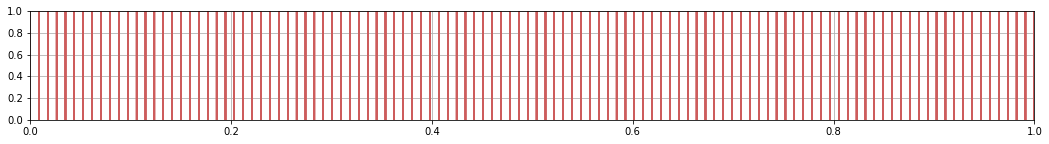

In [32]:
r = pi
# r = 2.0**0.5
# r = np.exp(1)
x = [(i*r)%1 for i in range(1000)]
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(18,2))
for i in x:
    ax.axvline(i, color='indianred', alpha=0.6)
ax.grid()
plt.show()

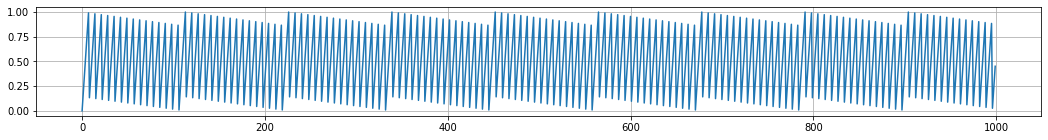

In [33]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(18,2))
ax.plot(x)
ax.grid()
plt.show()

# The INT Function
## Verticle and Horizontal Properties

Verticle Coun VC and Verticle Sep VS

The nth term of VC is the coun of the nth derivative of $\eta(\alpha)$, analogous definition for VS

Write a function to compute these sequences

In [34]:
def vcvs(alpha, n, l=500000):
    #
    # alpha: parameter to compute the eta sequence with
    # n    : derivative depth
    # l    : is the length of the eta sequence
    #
    stc = []  # store coun
    sts = []  # store sep
    e = [str(eta(alpha, i)) for i in range(l)]   
    
    def sepsc(e):
        #
        # e is passed in as a list
        # the first and last elements could be spurious
        # throw out one more, why not
        #
        e = e[2:-2]
        # determine the permissible sep and coun
        sc = list(set(e))
        # convert to a string and proceed per usual
        e = "".join(e)
        l0 = len(e.split(sc[0]))
        l1 = len(e.split(sc[1]))
        s = sc[0] if l0 < l1 else sc[1]
        c = "".join(sc).replace(s, '')
        return sc, s, c

    sc, s, c = sepsc(e)

    stc.append(c)
    sts.append(s)
    de = e
    for idx in range(n):
        de = [str(int(len(i))) for i in ''.join(de).split(sts[-1])]
        try:
            sc, s, c = sepsc(de)
            stc.append(c)
            sts.append(s)            
        except:
            print('>>> fault at {} <<<'.format(idx))

    print(pd.DataFrame(data=np.vstack((stc, sts)).T, columns=['VC', 'VS']))

In [35]:
vcvs(np.exp(1), 20, 50000000)

>>> fault at 11 <<<
>>> fault at 12 <<<
>>> fault at 13 <<<
>>> fault at 14 <<<
>>> fault at 15 <<<
>>> fault at 16 <<<
>>> fault at 17 <<<
>>> fault at 18 <<<
>>> fault at 19 <<<
    VC  VS
0    3   2
1    3   2
2    1   2
3    4   3
4    1   2
5    6   5
6    1   2
7    8   7
8    1   2
9   10   9
10   2   4
11  11  12


In [36]:
vcvs(2.0**0.5, 8, 1000000)

  VC VS
0  1  2
1  1  2
2  1  2
3  1  2
4  1  2
5  1  2
6  1  2
7  1  2
8  1  2


In [37]:
vcvs((1.0 + 5.0**0.5)/2.0, 8, 1000000)

  VC VS
0  2  1
1  2  1
2  2  1
3  2  1
4  2  1
5  2  1
6  2  1
7  2  1
8  2  1


In [38]:
vcvs(pi, 8, 50000000)

>>> fault at 6 <<<
>>> fault at 7 <<<
    VC   VS
0    3    4
1    6    7
2   15   14
3  586  584
4    6    3
5    3    2
6    4    3


## Eta-sequences and Continued Fractions
The VC, VS sequence of e looks like its continued fraction expansion which proceeds as
2, 1, 4, 1, 1, 6, 1, 1, 8, 1, 1, 10.



In [39]:
def swap(ee):
    sc = list(set(ee))
    for i, v in enumerate(ee):
        if v == sc[0]:
            ee[i] = 'a'
    for i, v in enumerate(ee):
        if v == sc[1]:
            ee[i] = sc[0]
    for i, v in enumerate(ee):
        if v == 'a':
            ee[i] = sc[1]     
    return ee

In [40]:
e0 = [eta((1.0 + 5.0**0.5)/2.0, i) for i in range(30)]
print(e0)
print(swap(e0))

[1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2]
[2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1]


In [41]:
n = 300000

r0 = (1.0 + 5.0**0.5)/2.0
r1 = 2.0**0.5

e0 = [eta(r0, i) for i in range(n)]
e1 = [eta(r1, i) for i in range(n)]

print(r0, np.mean(np.array(e0)))
print(r1, np.mean(np.array(e1)))

e0 = swap(e0)
e1 = swap(e1)

print(r0, np.mean(np.array(e1)))
print(r1, np.mean(np.array(e0)))

1.618033988749895 1.6180333333333334
1.4142135623730951 1.4142133333333333
1.618033988749895 1.5857866666666667
1.4142135623730951 1.3819666666666666


## Compute the Continued Fraction Expansion of Alpha
This will give a way to compute alpha from its vc-vs sequence

First, write a better way to determine the VC-VS sequence for alpha.  The below will show the new, faster way of computing the VS-VS sequence and validate it against the brute force method.

In [42]:
def Dalpha(alpha, e):
    sc = list(set(e))
    e = "".join([str(i) for i in e])
    l0 = len(e.split(str(sc[0])))
    l1 = len(e.split(str(sc[1])))
    s = sc[0] if l0 < l1 else sc[1]
    c = "".join(str(i) for i in sc).replace(str(s), '')
    return (float(s) - alpha) / (alpha - float(c)), s, c

def gen_vcvs(alpha, n, l=100000, bprint=True):
    stc = []  # store coun
    sts = []  # store sep
    salpha = [alpha]  # store the progression of alpha
    
    def sepsc(e):
        # determine the permissible sep and coun
        sc = list(set(e))
        # convert to a string and determine sep and coun
        e = "".join(e)
        l0 = len(e.split(sc[0]))
        l1 = len(e.split(sc[1]))
        s = sc[0] if l0 < l1 else sc[1]
        c = "".join(sc).replace(s, '')
        return sc, s, c
    
    for idx in range(n):
        #
        # Generate the eta sequence for alpha to pass to
        # the differentiator Dalpha.
        # l just has to be long enough to expose the sep and coun.
        #
        e = [str(eta(salpha[-1], i)) for i in range(l)]  
        alpha, s, c = Dalpha(salpha[-1], e)

        salpha.append(alpha)
        stc.append(c)
        sts.append(s)
    
    VCVS = pd.DataFrame(data=np.vstack((stc, sts)).T, columns=['VC', 'VS'])
    if bprint:
        print(VCVS)
    return salpha, VCVS.values

In [43]:
alpha, vcvs0 = gen_vcvs(np.exp(1), 20)

    VC  VS
0    3   2
1    3   2
2    1   2
3    4   3
4    1   2
5    6   5
6    1   2
7    8   7
8    1   2
9   10   9
10   1   2
11  12  11
12   1   2
13  11  10
14   6   7
15   2   3
16   5   4
17   1   2
18   5   6
19   2   1


In [44]:
# vcvs(np.exp(1), 20, 100000000)

In [45]:
vcvs(pi, 8, 50000000)

>>> fault at 6 <<<
>>> fault at 7 <<<
    VC   VS
0    3    4
1    6    7
2   15   14
3  586  584
4    6    3
5    3    2
6    4    3


In [46]:
alpha, vcvs0 = gen_vcvs(pi, 10)

    VC   VS
0    3    4
1    6    7
2   15   14
3  293  292
4    2    1
5    3    2
6    4    3
7   14   15
8    2    3
9    2    3


In [47]:
alpha, vcvs0 = gen_vcvs(2.0**0.5, 10)

  VC VS
0  1  2
1  1  2
2  1  2
3  1  2
4  1  2
5  1  2
6  1  2
7  1  2
8  1  2
9  1  2


In [48]:
alpha, vcvs0 = gen_vcvs((1.0+5.0**0.5)/2.0, 10)

  VC VS
0  2  1
1  2  1
2  2  1
3  2  1
4  2  1
5  2  1
6  2  1
7  2  1
8  2  1
9  2  1


## Convert the VC-VS sequence generated by the old style derivative to that which would be created by the new style derivative

In [49]:
def o2n(x):
    x[1:, :] = x[1:, :] + 1.
    return x

In [50]:
r0 = 2.0**0.5
r0 = (1.0 + 5.0**0.5) / 2.0 - 1.0 - 0.5
# r0 = np.exp(1)
# r0 = pi - 3.0
r0 = 0.11687816
print(r0)
alpha, _vcvs0 = gen_vcvs(r0, 10)
vcvs0 = o2n(np.array(_vcvs0, float))

0.11687816
   VC  VS
0   0   1
1   8   7
2   1   2
3   3   2
4  33  34
5   3   4
6  18  17
7   2   3
8   6   5
9   2   3


### Compute the continued fraction

In [51]:
# compute the continued fraction expansion
cc = 0.0
for _i in range(vcvs0.shape[0] - 1):
    i = -1 - _i
    print(_i, i)
    vc = vcvs0[i, 0]
    vx = vcvs0[i-1, 1] - vcvs0[i-1, 0]
    cc = vx / (vc + cc)
reco = vcvs0[0, 0] + cc

print(cc)
print('expected: {} | recovered: {}\n%accuracy {}'.format(r0, reco, (r0-reco)/r0*100.))

0 -1
1 -2
2 -3
3 -4
4 -5
5 -6
6 -7
7 -8
8 -9
0.11687816
expected: 0.11687816 | recovered: 0.11687816
%accuracy 0.0


In [52]:
print(vcvs0)
vcvs0 = np.vstack((vcvs0[:,1], vcvs0[:,0])).T
print(vcvs0)

[[ 0.  1.]
 [ 9.  8.]
 [ 2.  3.]
 [ 4.  3.]
 [34. 35.]
 [ 4.  5.]
 [19. 18.]
 [ 3.  4.]
 [ 7.  6.]
 [ 3.  4.]]
[[ 1.  0.]
 [ 8.  9.]
 [ 3.  2.]
 [ 3.  4.]
 [35. 34.]
 [ 5.  4.]
 [18. 19.]
 [ 4.  3.]
 [ 6.  7.]
 [ 4.  3.]]


In [53]:
cc = 0.0
for _i in range(vcvs0.shape[0] - 1):
    i = -1 - _i
    print(_i, i)
    vc = vcvs0[i, 0]
    vx = vcvs0[i-1, 1] - vcvs0[i-1, 0]
    cc = vx / (vc + cc)
reco = vcvs0[0, 0] + cc
print(reco)

0 -1
1 -2
2 -3
3 -4
4 -5
5 -6
6 -7
7 -8
8 -9
0.8805906810914526


## We should have all the tools we need to plot INT
Note, INT is undefined at the rationals

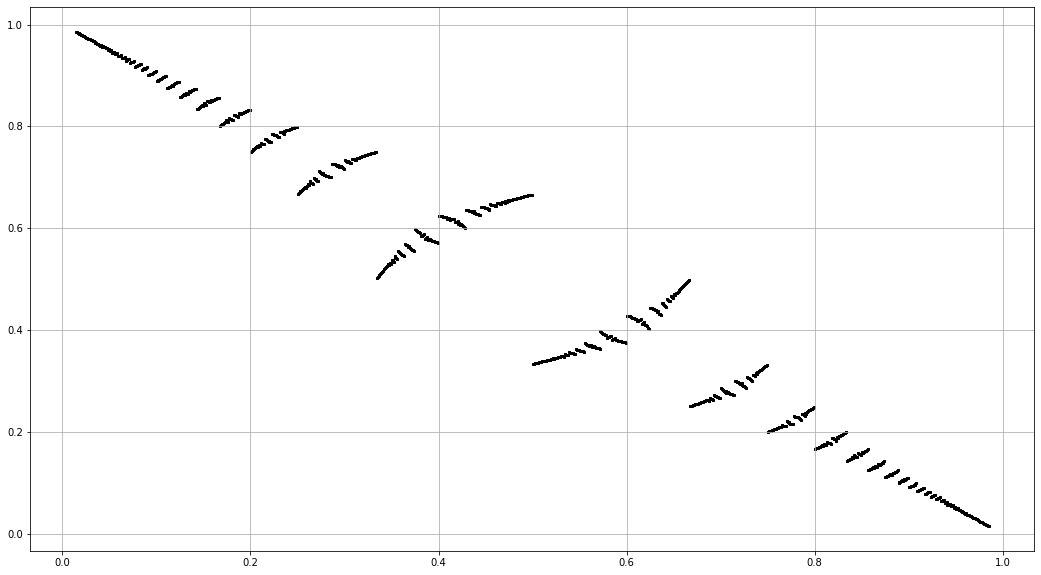

In [56]:
a = 2**0.5-1.4
_alpha = np.linspace(0.1, 0.9, 10)
_alpha = [(1.0 + 5.0**0.5) / 2.0 - 1.0]
_alpha = np.arange(a, 1.0-a, 0.001)
_beta = []
for alpha in _alpha:
    #
    # compute VC-VS for alpha
    #
    _, _vcvs0 = gen_vcvs(alpha, 10, bprint=False)

    #
    # convert to the new style derivative
    #
    vcvs0 = o2n(np.array(_vcvs0, float))
    
    #
    # flip the VC and the VS columns
    # 
    vcvsf = np.vstack((vcvs0[:,1], vcvs0[:,0])).T
    
    #
    # sum the continued fraction of the flipped
    # VCVS sequence yeilding beta
    #
    cc = 0.0
    for _i in range(vcvsf.shape[0] - 1):
        i = -1 - _i
        vc = vcvsf[i, 0]
        vx = vcvsf[i-1, 1] - vcvsf[i-1, 0]
        cc = vx / (vc + cc)
    beta = vcvsf[0, 0] + cc
    _beta.append(beta)

fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(18,10))
ax.scatter(_alpha, _beta, marker="s", color='black', s=2)
ax.grid()
plt.show()

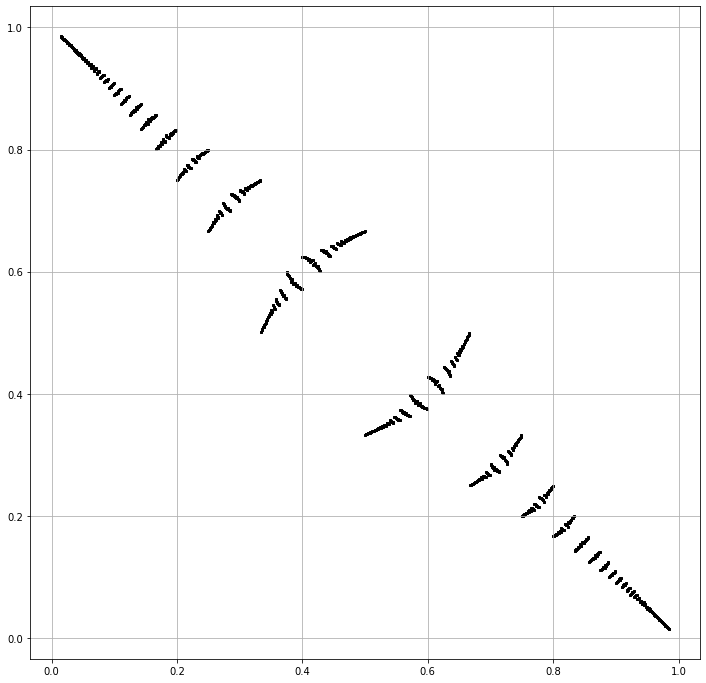

In [57]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(12,12))
ax.scatter(_alpha, _beta, marker="s", color='black', s=2)
ax.grid()
plt.show()